### The selected methods

**The following methods were used for doing forecastingm (please refer to another presented notebooks for more details):**

+ prophet: it was decided to use this model as the classical method, since it is newer than the classical statistical models (like ARIMA), has less assumptions, and shows good performance on some benchmarks.

+ lstm with the linear layer for forecasting: since the data is not very big, and does not look very complex, it was decided to start with simple neural network architectures. Lstm with a linear layer for predicitons seemed to be a good starting point, since it is a simple and effective architecture. However, it is still better then rnns or mlp without the sequential data processing. However, while training these models, it became clear that the lstm model is not able to learn the patterns in the data, and the performance is not very good. Hence, it was decided to try more complex architectures, like seq2seq.

+ lstm seq2seq: outperformed lstm with the linear layer, and showed overall the best performance among all the deep learning based models. However, the overall performance was still not very good, and worse than the performance of the prophet model.

+ transformer: since lstm seq2seq outperformed lstm with linear layer, we came up with a hypothesis that using even more complex model will results in better forecasting. Unfortunately, the transformer model performed worse than lstm seq2seq, and it was decided to stop using this method after training on h1.

### Esperimental settings

+ For training Prophet, the default parameters were used. The reason is that in Prophet, the hyperparameter tuning is not that important (at least from my experience and in my opinion). Instead, setting up the hyperparameters so that they align with the data distribution makes more sense. However, since the creators of the model claim that Prophet works well with the default hyperparameters, we will not do the hyperparameter selection. Instead, we will see whether the default Prophet can outperform a neural network in forecasting the time serieses we are working with. In this sense, the validation dataset is not very important, because we do not tune the hyperparameters using it, and we do not calculate losses on it while training (this is what we will do while training the neural network). Hence, while training Prophet, we can just combine the train and validation datasets together, and then test the model on the test dataset.

+ For seq2seq, the following hyperparameters were used (please check the 3_forecasting_seq2seq.ipynb and lstm_seq2seq.py files for more details):

HIDDEN_SIZE = 1024, 
FORECAST_STEPS = 96
NUM_LAYERS = 2
DROPOUT = 0.5
LEARNING_RATE = 0.0001
N_EPOCHS = 50
N_EARLY_STOP = 10
TEACHER_FORCING_START_RATIO = 0.6

### Metrics

While training different models on different datasets, we recorded the mse and mae. Since the results of using lstm + linear layer and the transformer are not satisfactory, we will compare with each other only prophet and seq2seq lstm

In [1]:
import pandas as pd
prophet_metrics = pd.read_csv('metrics/prophet_metrics.csv')
seq2seq_metrics = pd.read_csv('metrics/seq2seq_metrics.csv')

In [2]:
all_metrics = pd.concat([prophet_metrics, seq2seq_metrics], axis=0)
all_metrics.index = range(len(all_metrics))
all_metrics

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
4,prophet,96,m1,0.117716,0.319764
5,prophet,192,m1,0.063154,0.199072
6,prophet,96,m2,0.087718,0.268407
7,prophet,192,m2,0.083220,0.263415
8,seq2seq,96,h1,0.128101,0.317324
9,seq2seq,192,h1,0.197308,0.419526


##### Check which models performed the best

In [3]:
minimal_mse_rows = all_metrics.loc[all_metrics.groupby(['dataset', 'prediction_length'])['mse'].idxmin()]
minimal_mse_rows

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
12,seq2seq,96,m1,0.008156,0.079113
5,prophet,192,m1,0.063154,0.199072
6,prophet,96,m2,0.087718,0.268407
7,prophet,192,m2,0.083220,0.263415


In [4]:
minimal_mae_rows = all_metrics.loc[all_metrics.groupby(['dataset', 'prediction_length'])['mae'].idxmin()]
minimal_mae_rows

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
12,seq2seq,96,m1,0.008156,0.079113
5,prophet,192,m1,0.063154,0.199072
6,prophet,96,m2,0.087718,0.268407
7,prophet,192,m2,0.083220,0.263415


We see that prophet performed the best in most of the cases, according to mse and mae. It was outperformed only on m1 dataset by the seq2seq model. However, in this case seq2seq forecasted constant values, hence, we cannot say that it was better than prophet. Meanwhile, these metrics are not very informative, hence, it makes more sense to look at the graphs

### Graphs

##### h1

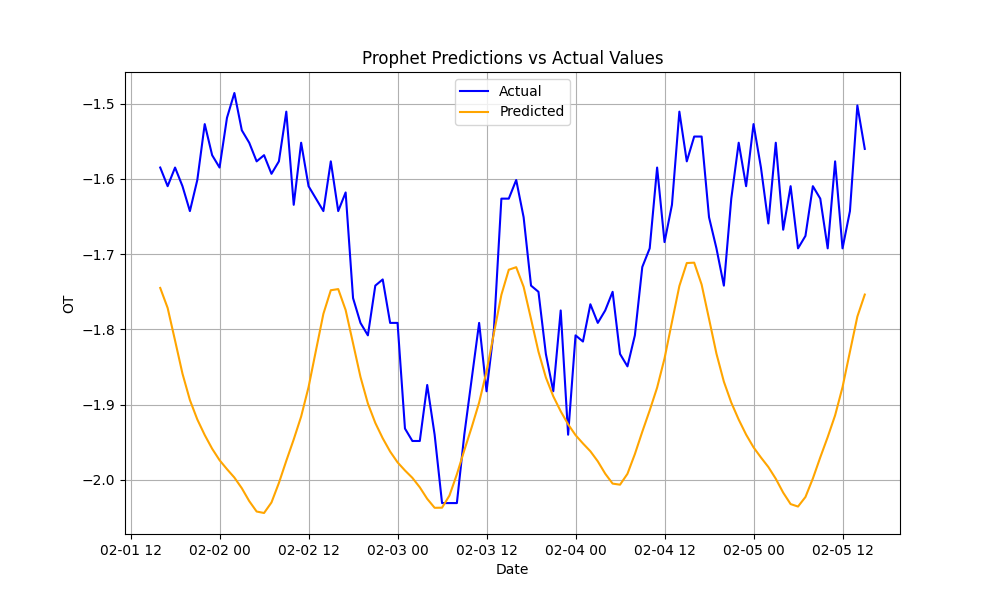

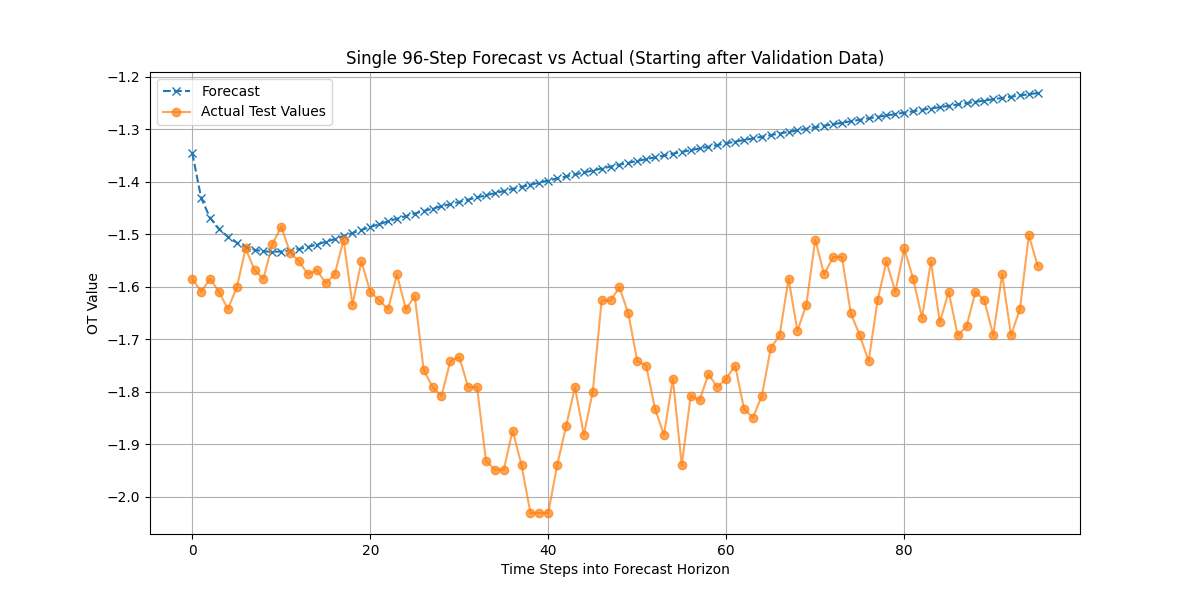

In [6]:
from PIL import Image
from IPython.display import display

prophet_96 = Image.open('results_images/prophet/prophet_h1_96.png')
display(prophet_96)

seq2seq_96 = Image.open('results_images/seq2seq/seq2seq_h1_96.png')
display(seq2seq_96)

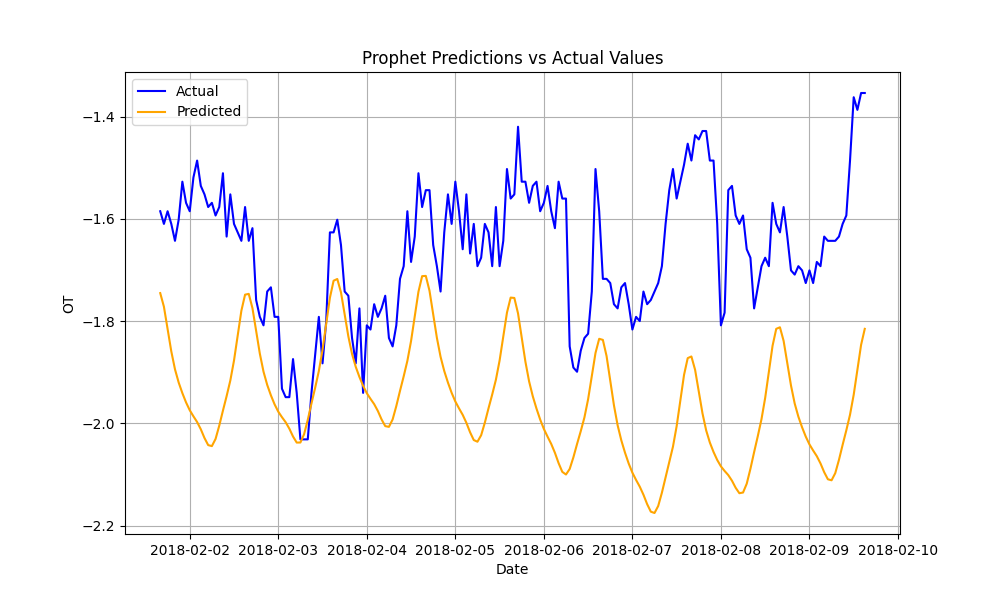

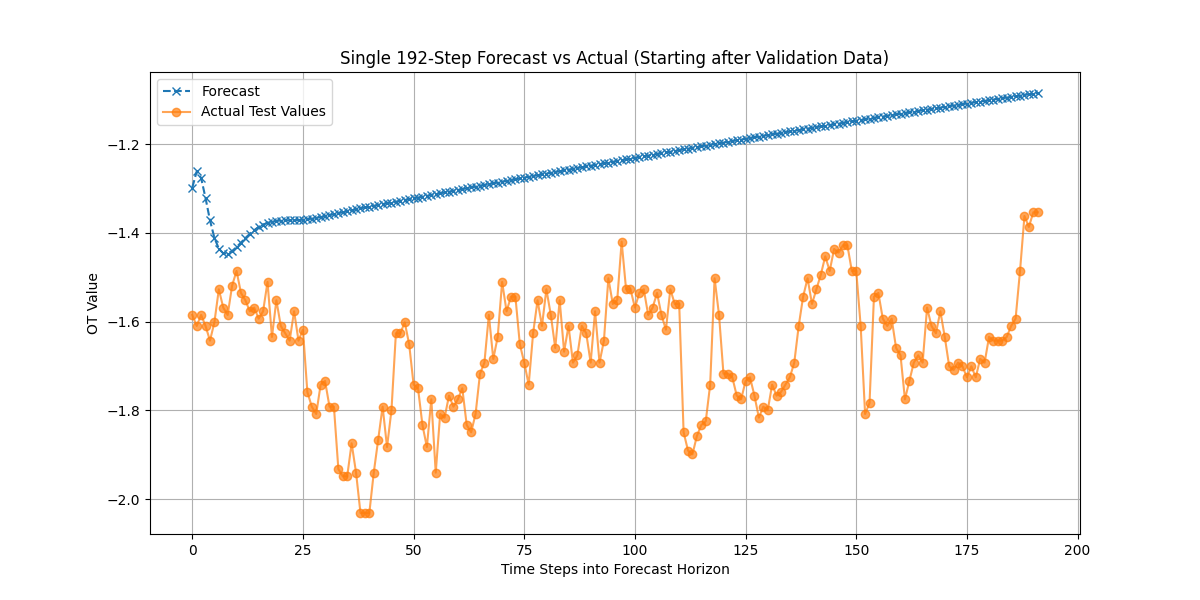

In [ ]:
prophet_192 = Image.open('results_images/prophet/prophet_h1_192.png')
display(prophet_192)

seq2seq_192 = Image.open('results_images/seq2seq/seq2seq_h1_192.png')
display(seq2seq_192)

**We see that prophet outperformed the seq2seq model, because it actually made the forecasts, instead of just predicting the upward trend. Moreover, the forecasts are not too bad (although not good either)**

##### h2

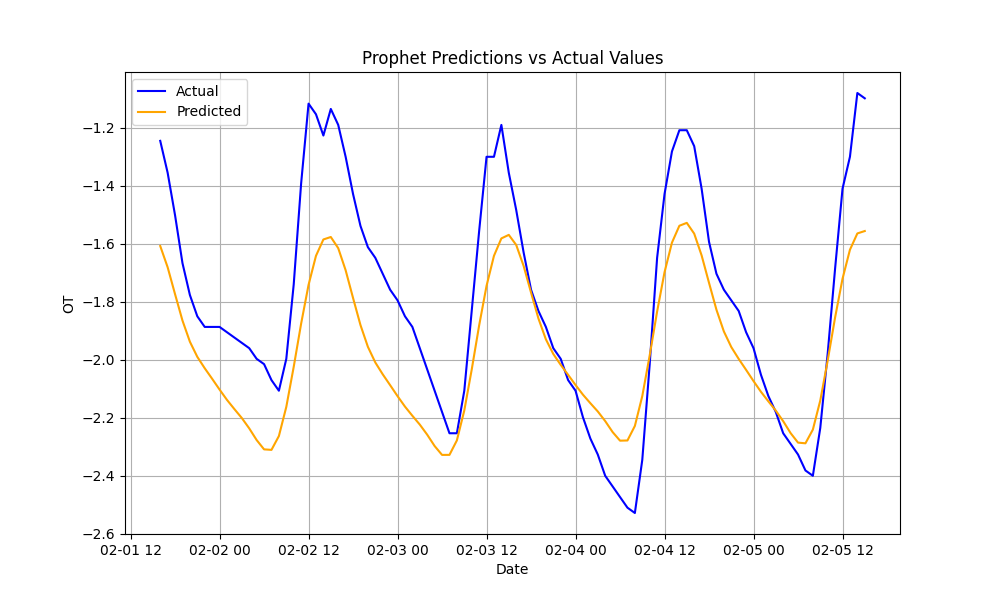

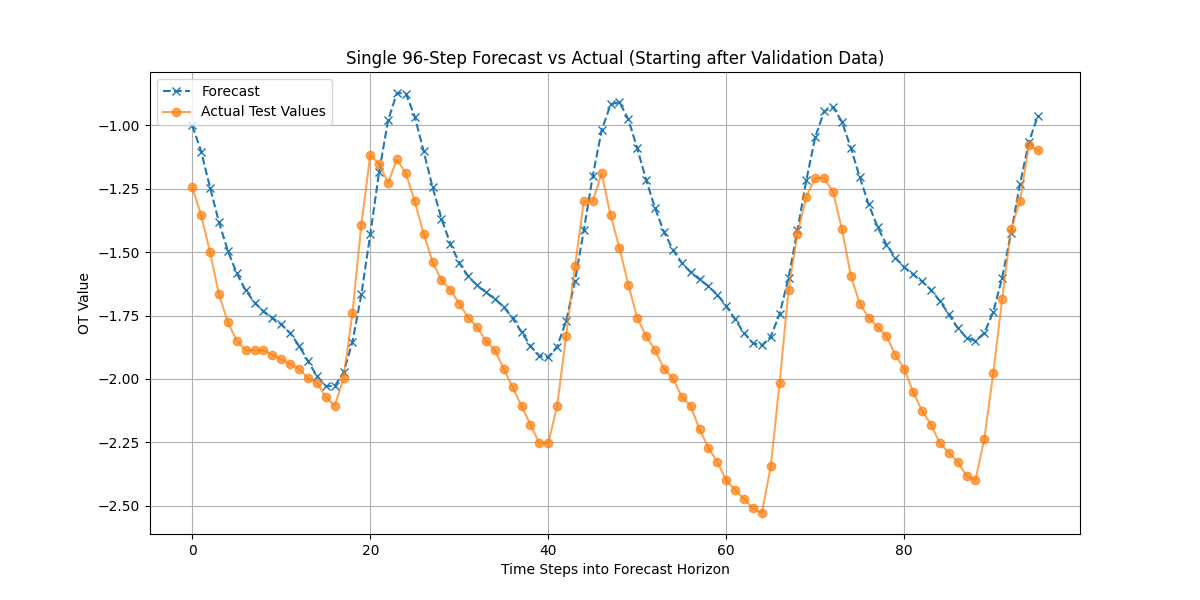

In [8]:
prophet_96 = Image.open('results_images/prophet/prophet_h2_96.png')
display(prophet_96)

seq2seq_96 = Image.open('results_images/seq2seq/seq2seq_h2_96.png')
display(seq2seq_96)

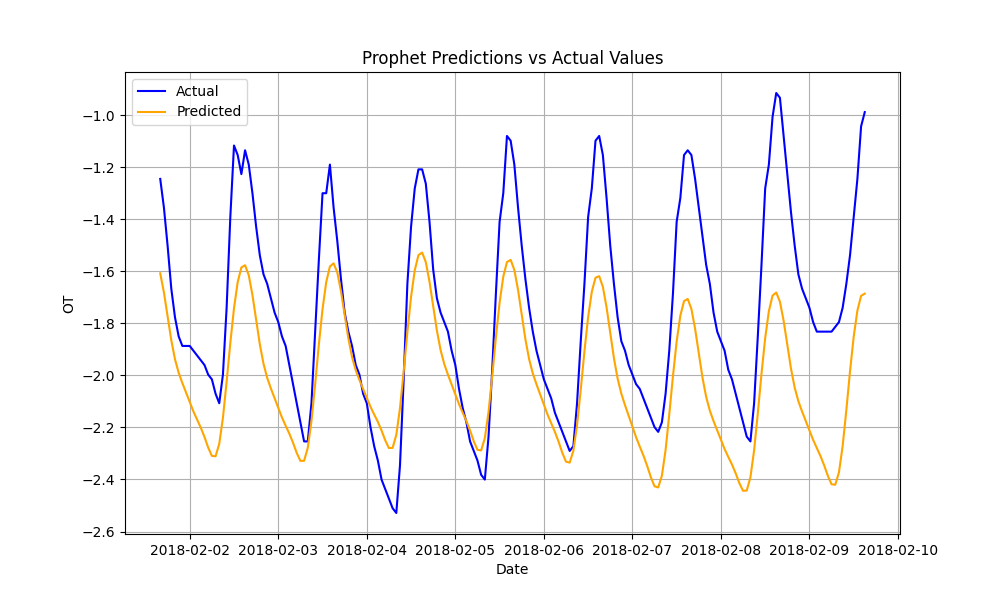

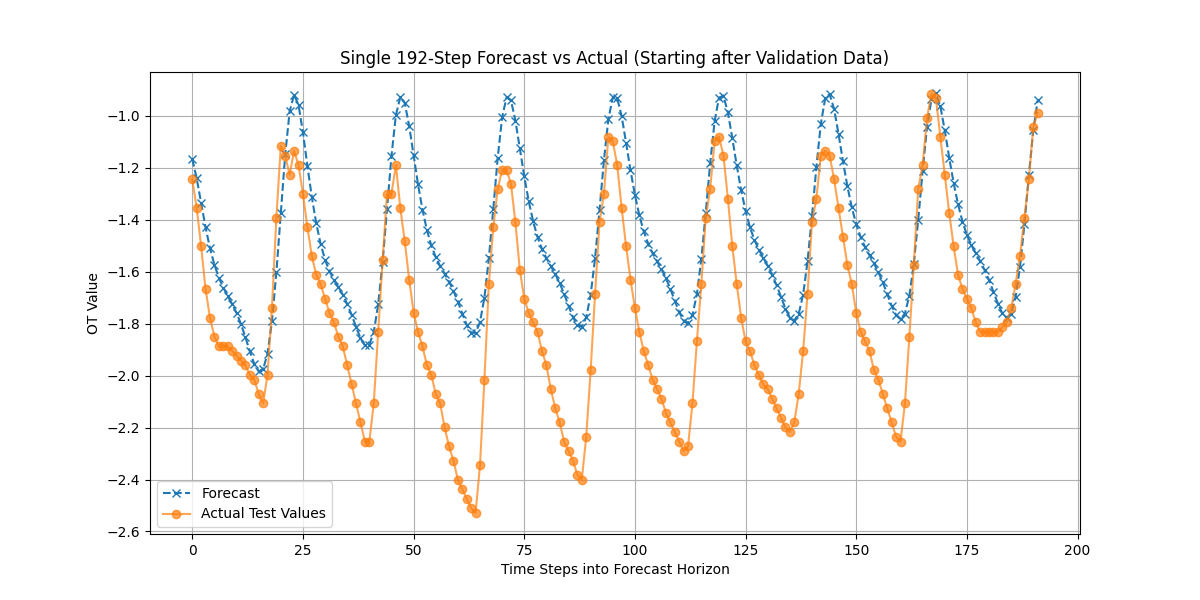

In [ ]:
prophet_192 = Image.open('results_images/prophet/prophet_h2_192.png')
display(prophet_192)

seq2seq_192 = Image.open('results_images/seq2seq/seq2seq_h2_192.png')
display(seq2seq_192)

Although prophet looks better in terms of metrics, I think that seq2seq model performed better on this dataset. Although the forecasts are a bit biased, I think that seq2seq captured the data dynamics better than prophet. Moreover, note that prophet was trained on the train and validation sets, while seq2seq was trained only on the train set. Hence, seq2seq might be better in terms of long-term forecasting

##### m1

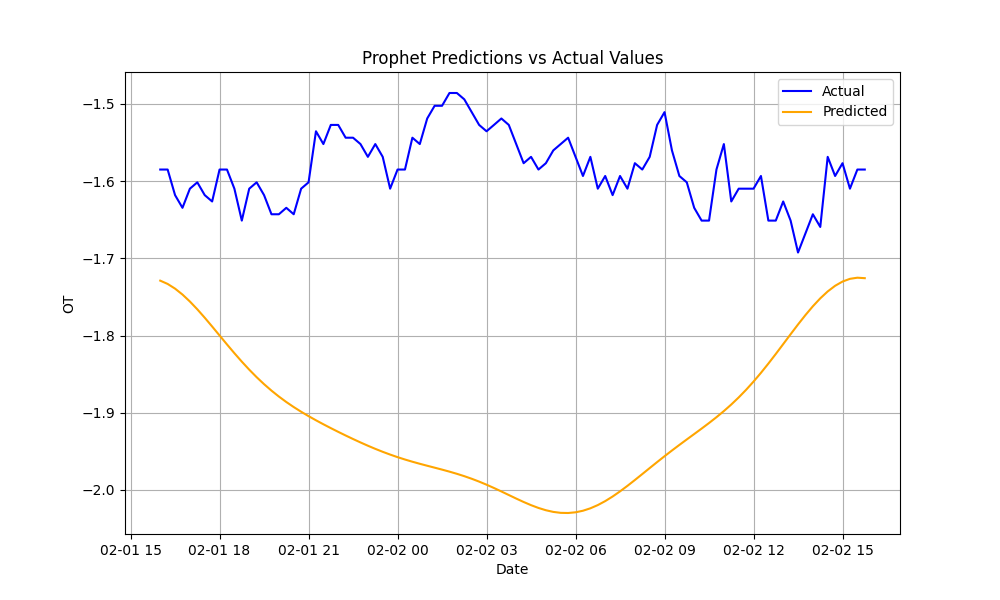

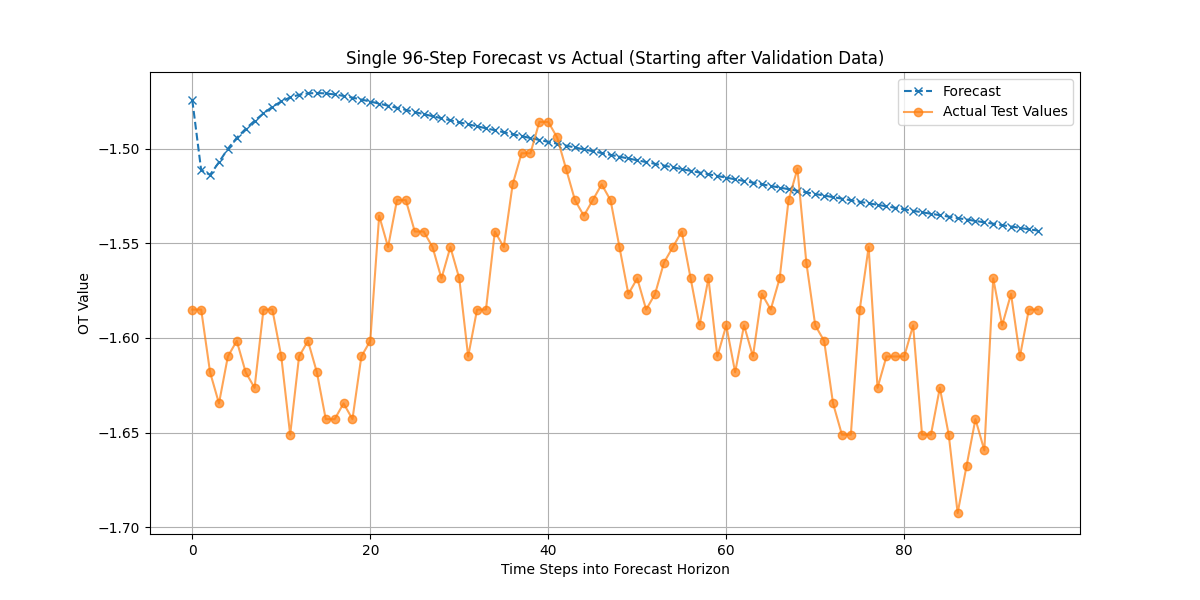

In [10]:
prophet_96 = Image.open('results_images/prophet/prophet_m1_96.png')
display(prophet_96)

seq2seq_96 = Image.open('results_images/seq2seq/seq2seq_m1_96.png')
display(seq2seq_96)

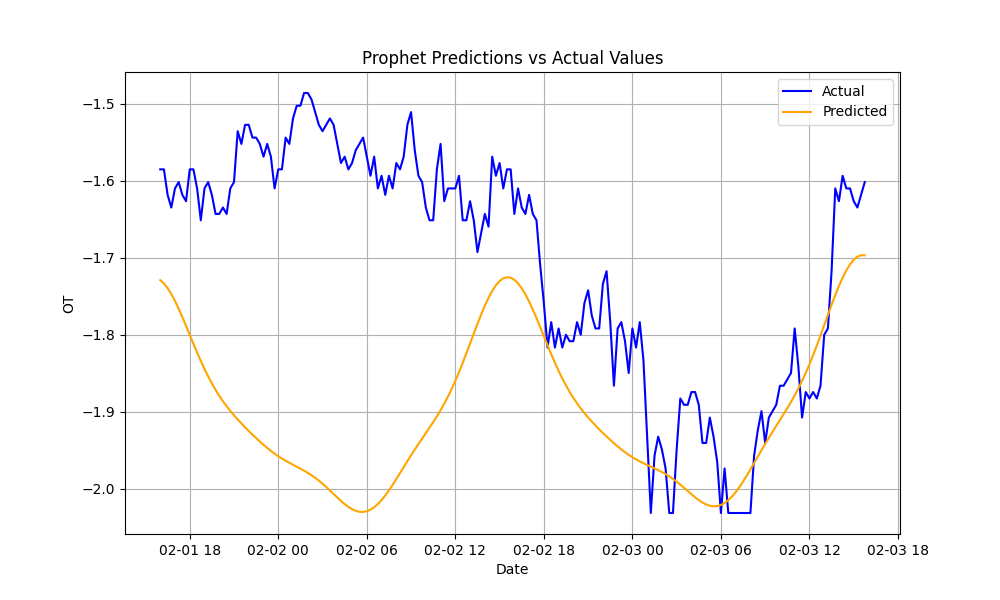

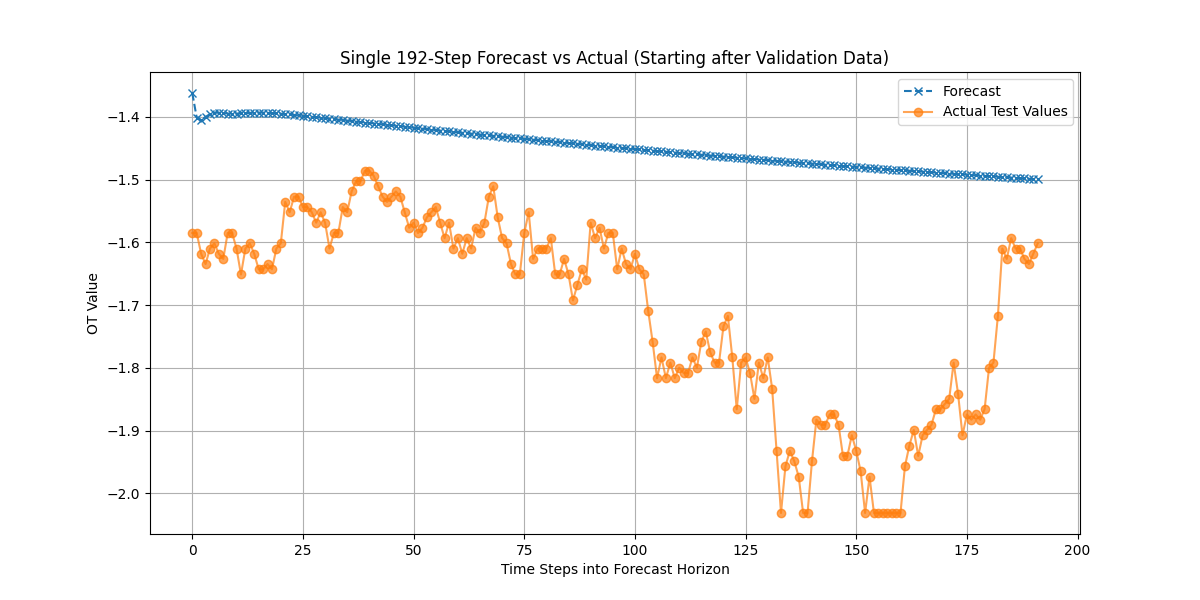

In [11]:
prophet_192 = Image.open('results_images/prophet/prophet_m1_192.png')
display(prophet_192)

seq2seq_192 = Image.open('results_images/seq2seq/seq2seq_m1_192.png')
display(seq2seq_192)

Both models performed bad. However, prophet at least tried to predict something, hence it is still better than seq2seq (although the performance is not good at all)

##### m2

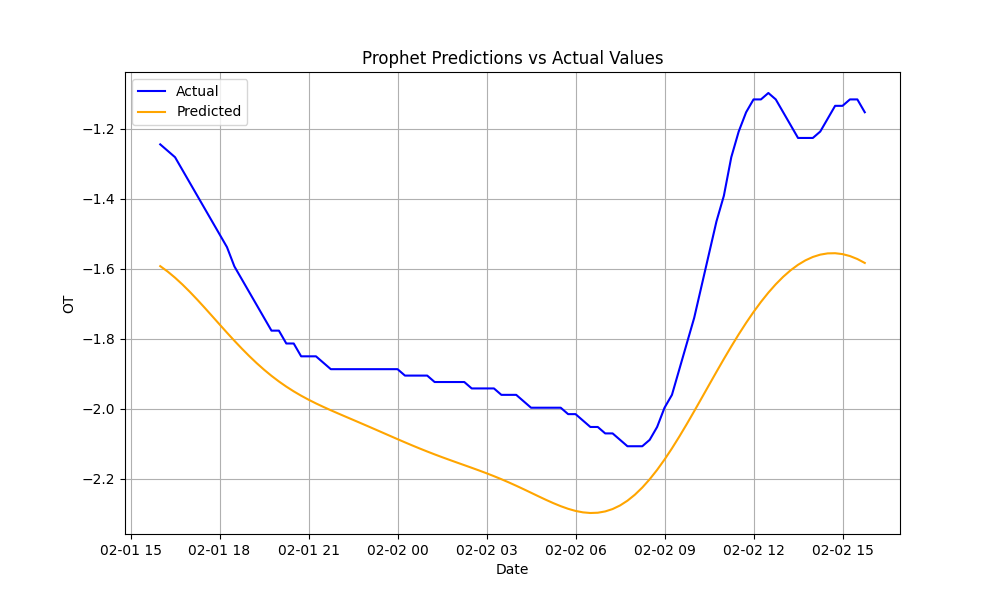

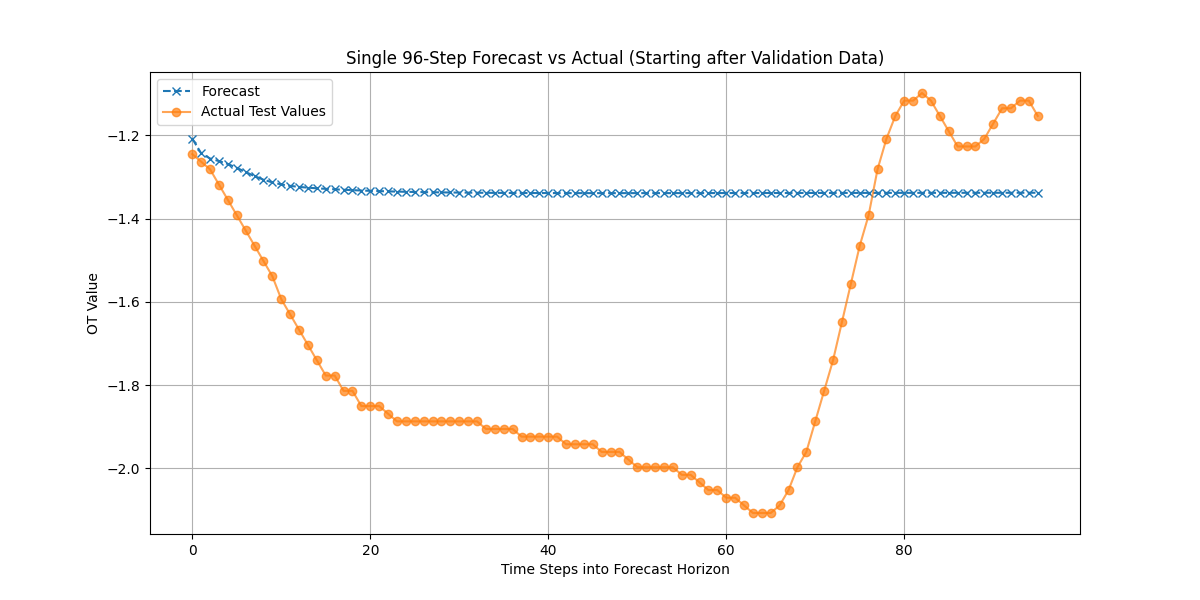

In [12]:
prophet_96 = Image.open('results_images/prophet/prophet_m2_96.png')
display(prophet_96)

seq2seq_96 = Image.open('results_images/seq2seq/seq2seq_m2_96.png')
display(seq2seq_96)

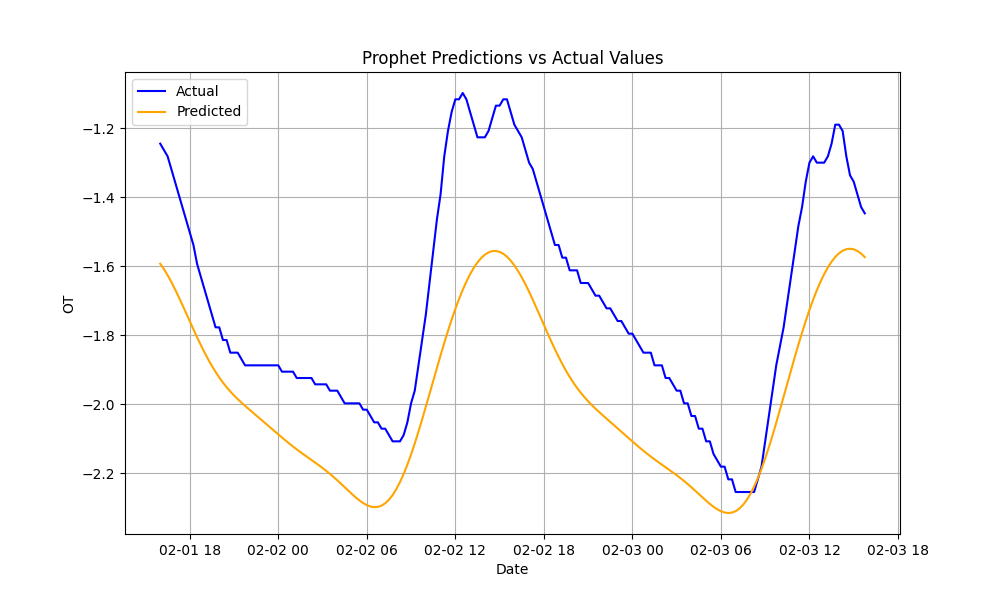

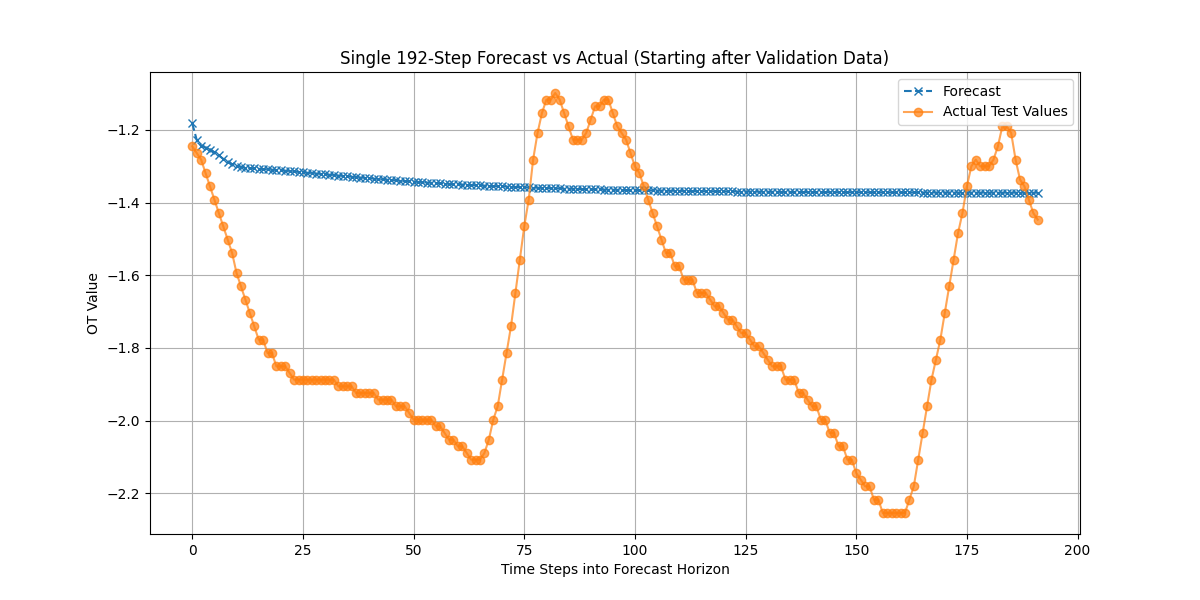

In [13]:
prophet_192 = Image.open('results_images/prophet/prophet_m2_192.png')
display(prophet_192)

seq2seq_192 = Image.open('results_images/seq2seq/seq2seq_m2_192.png')
display(seq2seq_192)

Prophet performed pretty well, while the seq2seq model, again, predicted almost constant values. However, note that m2 is very similar to h2, where seq2seq performed better, compared to prophet. Hence, seq2seq could potentially beat prophet on this dataset, especialy given that m2 has more data than h2. The issue was with the unstable training process. As a result, the validation loss was not improving starting from the second epoch. Hence, we got the forecasts from the network trained on the two epochs. Since the network did not learn the data patterns on these two epochs, the forecasts are nearly constant

### Results and the interpretation:

+ Prophet performed the best on h1, m1, and m2 datasets, while seq2seq performed better on the h2 dataset.

+ The main issue with the seq2seq model (and all the neural networks we tried) was very unstable training process. Instead of decreasing smoothly, the loss on validation set was jumping around. Hence, to make neural networks more effective for time series forecasting, probably the first important step is to figure out how to stabilize the training process.

+ The models in general performed better on the h2 and m2 datasets, rather than on h1 and m1. The reason is that the data distribution on train and test sets is different in case of h1 and m1 datasets. Hence, the models (especially neural networks) could not predict the test sets well, as these sets include the data patterns that were not observed in the train sets, hence, very hard to forecast.

+ H2 and m2, on the contatry, have the approximately same distribution on train and test sets, hence, it was easier for models to predict the test sets well. In addition, h2 and m2 looked overall more stationary, hence, it was easier to forecast them.

### Limitations:

+ Many of the important hyperparameters (including the input window size) were fixed due to the time and resource constaints. It might be worth it to experiment with different values of these hyperparameters to find the most suitable ones. Especially given that it turned out that hyperparameter tuning is crucial for the optimization of the time series forecasting neural networks.

+ We did not have enough time to implement the idea of using the seeds to make sure that the results are reproducible, and different launches of the same experiments do not lead to completely different results. In addition, the training process of the neural networks was not very stable, hence, it would be great if we could find ways to make it more stable.

+ In general, while working on the forecasting, we came up with many interesting ideas and observations. Unfortunately, we did not have enough time to implement some of the ideas and to test some of the hypotheses due to the time constaints and inconsistencies with out initial goals. However, it might be worth to continue working on this as a separate project in the future.

### Future Improvements:

+ Stabilize the training (to make the loss on validation decrease slowly, rather than jumping around).

+ Use the seeds to make sure that the results are reproducible, and different launches of the same experiments do not lead to completely different results.

+ Further experiment with model architectures to find the most suitable. Most likely it is Seq2Seq. However, we can still experiment.

+ Hyperparameter tuning. We have many hyperparameters to tune (both related to the newtork and dataloaders structure, as well as the training process). We can use random search or tools like optuna. However, this experiment will require significant time and resources, yet it is crucial for the optimization.

